In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame.from_csv("/home/marcelo/doodle/adventure_works_purchase_orders.csv", index_col=None)


/home/marcelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [2]:
df.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415


In [3]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['month'] = df['OrderDate'].dt.month
df['year'] = df['OrderDate'].dt.year
df = df[df.Sales_Region != 'Germany']
df["UnitProfit"] = df['UnitPrice'] - df['Unit_Cost']
df['Profit'] = df["UnitProfit"]*df["OrderQty"]
 

## Profit over time

Text(0.5,1,'Profit Over time (18 months)')

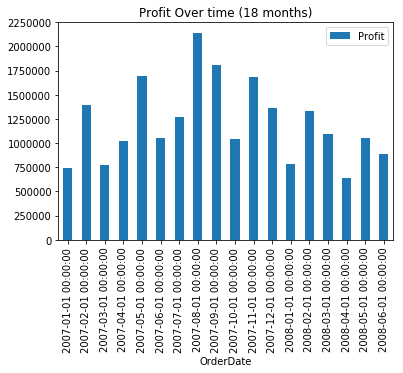

In [6]:
df[df.year >= 2007].groupby('OrderDate')[['Profit']].sum().sort_index().plot(kind = 'bar').set_title('Profit Over time (18 months)')


## Quantity Sold

Text(0.5,1,'Quantity sold Over time (18 months)')

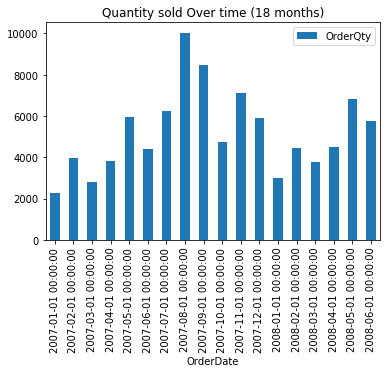

In [21]:
df[df.year >= 2007].groupby('OrderDate')[['OrderQty']].sum().sort_index().plot(kind = 'bar').set_title('Quantity sold Over time (18 months)')

## Profit Composition

Text(0.5,1,'Profit Composition')

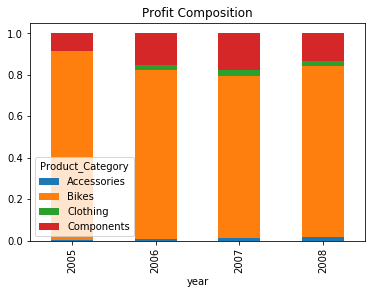

In [9]:
temp1 = df.groupby(['year', 'Product_Category'])['Profit'].sum().groupby('year').transform('sum')
temp2 = df.groupby(['year', 'Product_Category'])['Profit'].sum()
temp3 = pd.concat([temp1, temp2], axis = 1)
temp3['ProfitShare'] = temp3.iloc[:,1]/temp3.iloc[:,0]
temp3['ProfitShare'].unstack().plot(kind = 'bar', stacked = True).set_title('Profit Composition')


## Cost vs Price

In [12]:
df2 = df[df.year == 2008]
temp1 = df2[['month', 'Unit_Cost',  'UnitPrice', 'Product_Category']]

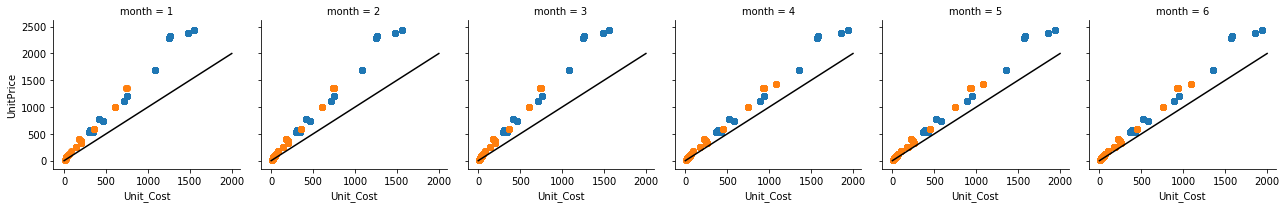

In [20]:
g = sns.FacetGrid(data = temp1[temp1.Product_Category.isin(['Bikes' ,'Components' ])], col = 'month', hue = 'Product_Category')
g = g.map(plt.scatter, "Unit_Cost", "UnitPrice")

axes = g.fig.axes
x = np.arange(0, 2000, .5)
y = x
for ax in axes:
    ax.plot(y, x, C='k')
plt.show()

## Boxplots

Text(0.5,1,'Unit Cost')

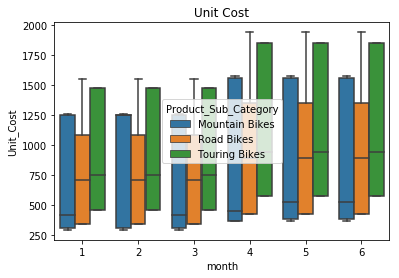

In [14]:
temp1 = df2[['month', 'Unit_Cost',  'UnitPrice', 'Product_Category', 'Product_Sub_Category']]
temp2 = temp1[temp1.Product_Category == 'Bikes']

sns.boxplot(data = temp2, x= 'month', y = 'Unit_Cost', hue = 'Product_Sub_Category').set_title('Unit Cost')

Text(0.5,1,'Unit Price')

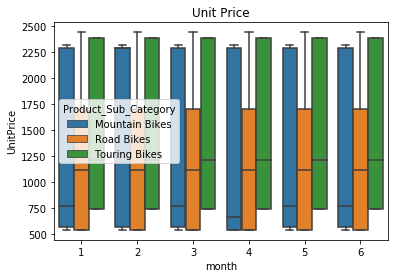

In [15]:
sns.boxplot(data = temp2, x= 'month', y = 'UnitPrice', hue = 'Product_Sub_Category').set_title('Unit Price')

## Price Changes

In [16]:
df2b = df2[df2.Product_Category == 'Bikes']
jan_bikes = df2b[df2b.month == 1]
jun_bikes = df2b[df2b.month == 6]

jan_bikes = jan_bikes.groupby('Product_Name')[['UnitPrice','Unit_Cost']].median()
jun_bikes = jun_bikes.groupby('Product_Name')[['UnitPrice','Unit_Cost']].median()

jan_jun = pd.concat([jan_bikes, jun_bikes], axis = 1)

In [17]:
Price_Change = (jan_jun.iloc[:, 2]/jan_jun.iloc[:,0]-1)*100
Cost_Change = (jan_jun.iloc[:, 3]/jan_jun.iloc[:,1]-1)*100

In [18]:
Price_Change.describe()

count    60.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: UnitPrice, dtype: float64

In [19]:
Cost_Change.describe()

count    6.000000e+01
mean     2.500000e+01
std      1.291759e-14
min      2.500000e+01
25%      2.500000e+01
50%      2.500000e+01
75%      2.500000e+01
max      2.500000e+01
Name: Unit_Cost, dtype: float64